In [530]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action='ignore')

In [531]:
## 1. Download the dataset of the US Housing Prices from [here](https://github.com/wadieskaf/ELTE_ITDS_Labs/tree/master/Datasets).
## 2. Load and explore the dataset.
df_usa_housing = pd.read_csv('../Datasets/USA_Housing.csv')
df_usa_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [532]:
x = df_usa_housing[['Avg. Area Number of Rooms']].values.reshape(-1, 1)
y = df_usa_housing['Price'].values.reshape(-1, 1)

In [533]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test

In [534]:
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_transformed = x_scaler.transform(x_train)
x_transformed

array([[-0.13160635],
       [ 0.80028487],
       [ 1.70375078],
       ...,
       [-0.36489661],
       [ 2.26846315],
       [ 0.89219611]])

In [535]:
scaler = StandardScaler()
scaler.fit(x_test)
transformed = scaler.transform(x_test)
#transformed.columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
transformed

array([[-5.83410498e-01],
       [-9.78319658e-02],
       [-3.59112286e-01],
       [ 8.62722066e-01],
       [-5.29104171e-01],
       [ 5.17228184e-01],
       [ 1.41814645e+00],
       [-1.12942751e+00],
       [-8.13000352e-01],
       [-2.36438645e-01],
       [-6.35138491e-01],
       [-1.75905695e-01],
       [-2.53678551e-01],
       [ 2.57435907e+00],
       [ 6.35467669e-01],
       [ 1.98081721e-01],
       [-8.12676926e-01],
       [-9.68401465e-02],
       [-3.48916187e-01],
       [-8.85748228e-01],
       [-1.16770928e+00],
       [-2.36538057e+00],
       [-1.59157540e+00],
       [-4.93143461e-01],
       [ 1.48971532e-01],
       [ 3.20684298e-01],
       [-1.64441716e-01],
       [-4.87860174e-01],
       [ 4.19487788e-01],
       [ 3.33579581e-01],
       [-2.82616045e-01],
       [ 6.48528730e-01],
       [ 1.55698425e+00],
       [ 1.18500833e+00],
       [-1.08152987e-01],
       [ 5.83162605e-02],
       [ 1.16411654e+00],
       [ 1.78721546e-01],
       [ 1.1

In [536]:
## 3. Process the dataset if needed.
## 4. Conduct comprehensive experiments with the dataset in order to find the best model to predict the prices. You need to do the following:
### 4.1. Choose features and target variable (price) and split data.
x = df_usa_housing[['Avg. Area Number of Rooms']].values.reshape(-1, 1)
y = df_usa_housing['Price'].values.reshape(-1, 1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [537]:
### 4.2. Train model(s).
model_1 = LinearRegression()
model_1.fit(x_train, y_train);

In [538]:
### 4.3. Evaluate model(s).
y_pred = model_1.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 263848.3886469575
MSE: 107666516394.19522


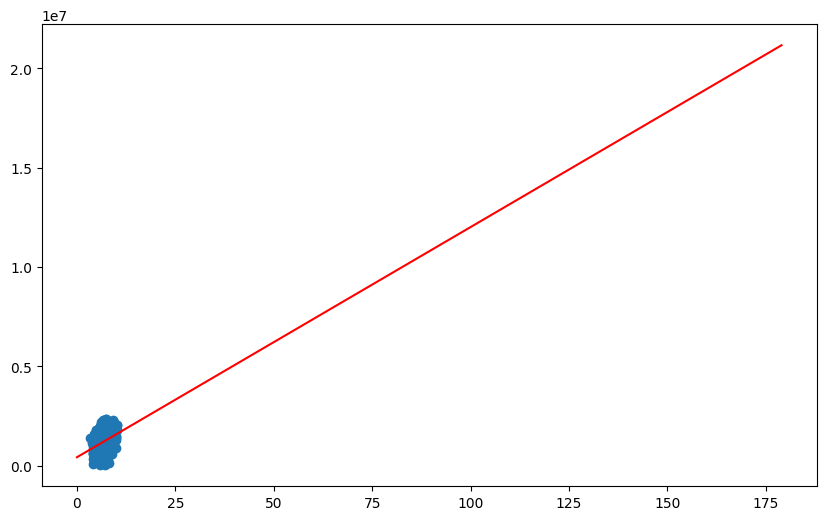

In [539]:
interval = np.arange(0, 180)
y_interval = model_1.predict(interval.reshape(-1, 1))

plt.figure(figsize=(10, 6))
X_original = [arr[0] for arr in x_train]
plt.scatter(x=X_original, y=y_train)
plt.plot(interval, y_interval, color='r')

In [540]:
### 4.4. Based on the results, you may need to do some feature engineering and/or regularization and try again.
x = df_usa_housing[['Avg. Area Number of Rooms', 'Avg. Area House Age']].values
y = df_usa_housing['Price'].values.reshape(-1, 1)

In [541]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [542]:
model_2 = LinearRegression()
model_2.fit(x_train, y_train);

In [543]:
y_pred = model_2.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 226966.48807944075
MSE: 81148504390.03754


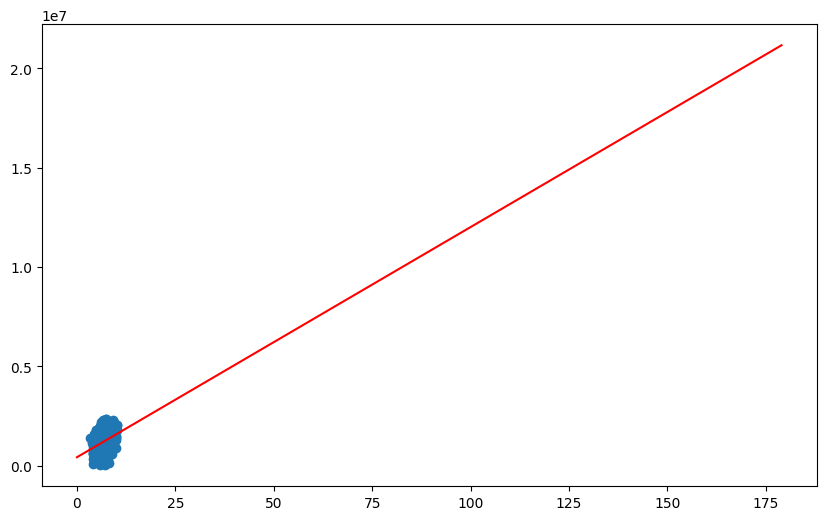

In [544]:
interval = np.arange(0, 180)
y_interval = model_1.predict(interval.reshape(-1, 1))

plt.figure(figsize=(10, 6))
X_original = [arr[0] for arr in x_train]
plt.scatter(x=X_original, y=y_train)
plt.plot(interval, y_interval, color='r')

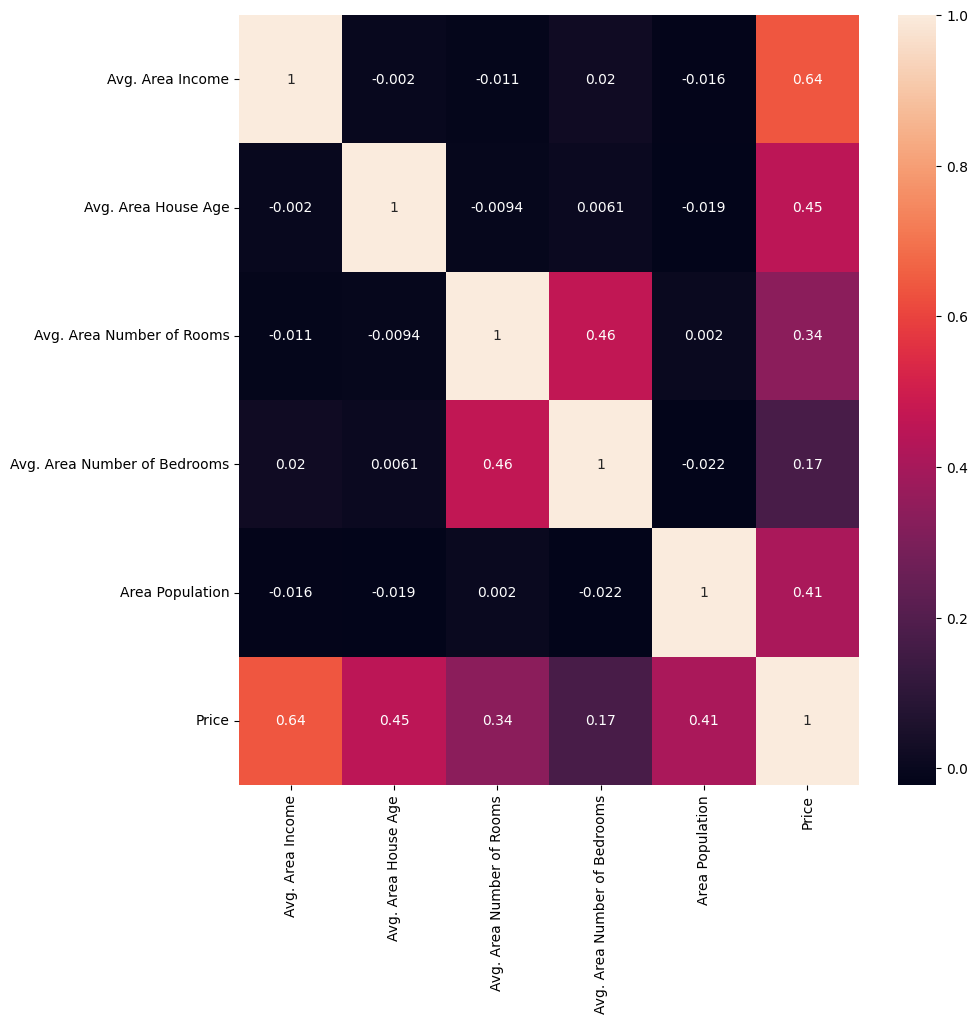

In [545]:
# correlation matrix visualization
plt.figure(figsize=(10, 10))
sns.heatmap(df_usa_housing.corr(), annot=True);

In [546]:
x = df_usa_housing[['Avg. Area Number of Rooms', 'Avg. Area House Age', 'Avg. Area Income']].values
y = df_usa_housing['Price'].values.reshape(-1, 1)

In [547]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [548]:
model_3 = LinearRegression()
model_3.fit(x_train, y_train);

In [549]:
model_3 = LinearRegression()
model_3.fit(x_train, y_train);

In [550]:
y_pred = model_3.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 139505.39532772664
MSE: 31169684089.30328


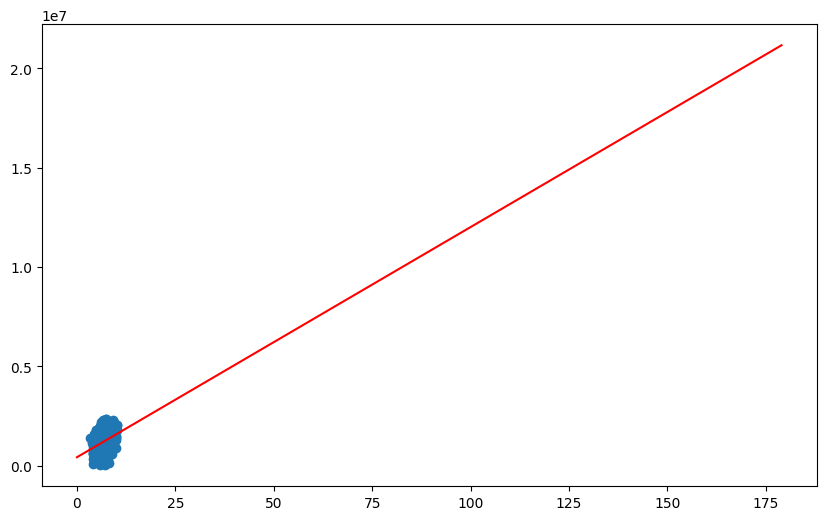

In [551]:
interval = np.arange(0, 180)
y_interval = model_1.predict(interval.reshape(-1, 1))

plt.figure(figsize=(10, 6))
X_original = [arr[0] for arr in x_train]
plt.scatter(x=X_original, y=y_train)
plt.plot(interval, y_interval, color='r')

In [552]:
# Create a dataframe to store the results
df_poly_experiments = pd.DataFrame(columns=['Experiment Number', 'Details', 'MAE', 'MSE'])

<Figure size 1500x1500 with 0 Axes>

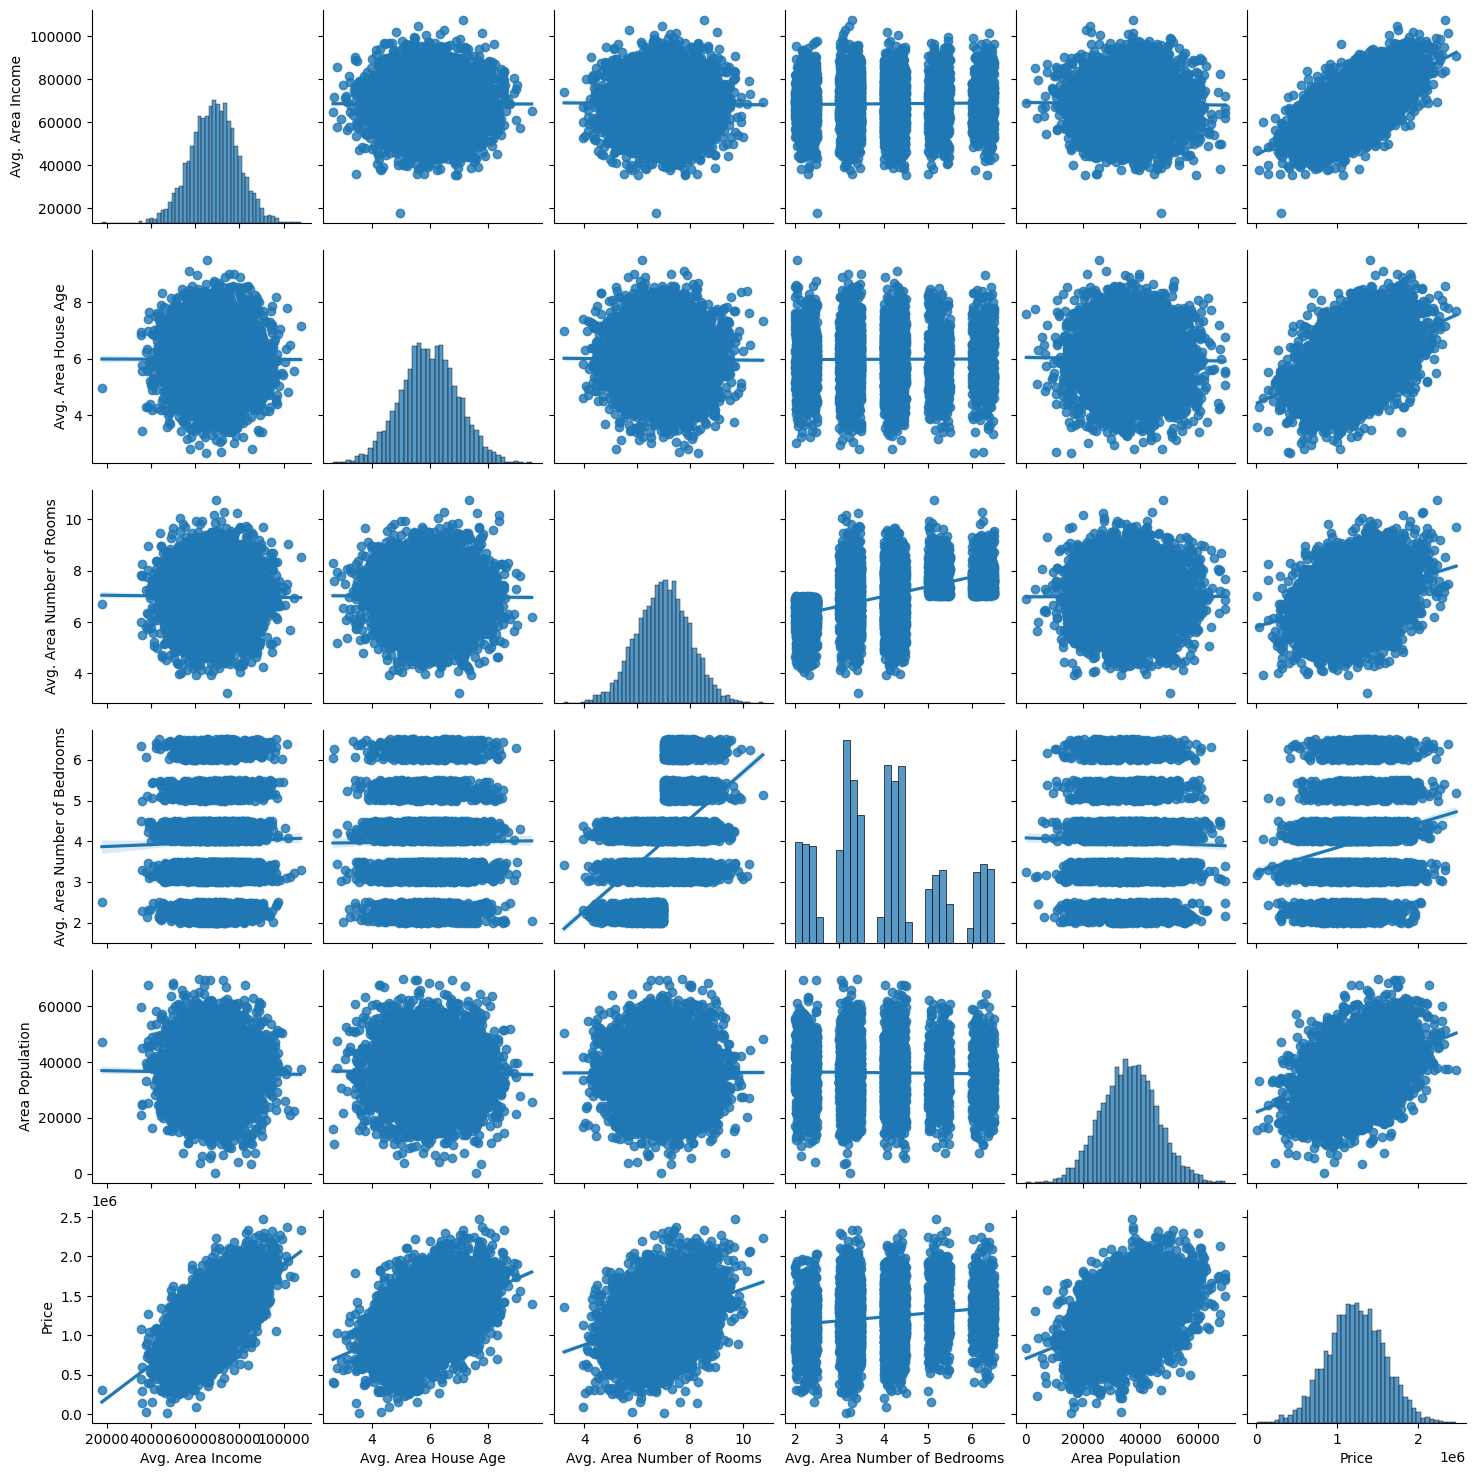

In [553]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_usa_housing, kind='reg')

In [554]:
y = df_usa_housing['Price'].values.re

AttributeError: 'numpy.ndarray' object has no attribute 're'

In [ ]:
### 4.5. Visualize the best model.
## 5. Write a summary of your experiments.